## Data Analysis: Boston Marathon 2017

By James Lee, 1/8/2023. Dataset from Kaggle (https://www.kaggle.com/datasets/rojour/boston-results?select=marathon_results_2017.csv).

The winners of the 2017 Boston Marathon are listed. Content: Name, age, gender, nation, city, and state (when applicable), times during the race's nine separate stages, estimated time, pace, overall position, gender position, and division position are all included.

## Motivation

For this year 2023 my ultimate goal is to run a marathon. Being new to this space I wanted to get a sense of the overall finish times of participants in a marathon, and also is wondering what the average time looks like for my age group. Therefore, I thought this was a great opportunity to practice my data analytic skills and also find out the answer to this question in my head. So here it is.

Hypothesis: Before analyzing, I think that gender and age would be the variable with the highest correlation to Official Time.

Questions:
- What are the age distributions of the finishers in a marathon?
- And also age distribution based on gender?
- What are the official times based on age and gender?
- What is the variable with the highest correlation to Official Time?
- What is the average time for my age group and gender?

In [67]:
# Importing Libraries
import pandas as pd
import seaborn as sns
#import numpy as np
import matplotlib.pyplot as plt
from statistics import mean

In [68]:
# Reading Data
df = pd.read_csv(r'C:\Users\jjael\Downloads\marathon_results_2017.csv')
df.head()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,11,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,NaN,NaN,...,1:16:59,1:33:01,1:48:19,2:02:53,0:04:57,-,2:09:37,1,1,1
1,1,17,"Rupp, Galen",30,M,Portland,OR,USA,NaN,NaN,...,1:16:59,1:33:01,1:48:19,2:03:14,0:04:58,-,2:09:58,2,2,2
2,2,23,"Osako, Suguru",25,M,Machida-City,NaN,JPN,NaN,NaN,...,1:17:00,1:33:01,1:48:31,2:03:38,0:04:59,-,2:10:28,3,3,3
3,3,21,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,NaN,NaN,...,1:17:00,1:33:01,1:48:58,2:04:35,0:05:03,-,2:12:08,4,4,4
4,4,9,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,NaN,NaN,...,1:16:59,1:33:01,1:48:41,2:05:00,0:05:04,-,2:12:35,5,5,5


In [70]:
# Checking for Null Values in Dataset
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

Unnamed: 0 - 0.0%
Bib - 0.0%
Name - 0.0%
Age - 0.0%
M/F - 0.0%
City - 0.0%
State - 0.13612268080272624%
Country - 0.0%
Citizen - 0.9525179856115108%
Unnamed: 9 - 0.9965543354789852%
5K - 0.0%
10K - 0.0%
15K - 0.0%
20K - 0.0%
Half - 0.0%
25K - 0.0%
30K - 0.0%
35K - 0.0%
40K - 0.0%
Pace - 0.0%
Proj Time - 0.0%
Official Time - 0.0%
Overall - 0.0%
Gender - 0.0%
Division - 0.0%


In [71]:
# Droping Unnecessary Columns
df = df.drop(['Unnamed: 0', 'Bib', 'Name','Citizen','Unnamed: 9','Proj Time','Pace', 
              '5K','10K','15K','20K','Half','25K','30K','35K','40K'], axis = 'columns')

In [72]:
# Changing Dataset Into Numeric Values to use for Correlation
df_numerized = df.copy()
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,Age,M/F,City,State,Country,Official Time,Overall,Gender,Division
0,24,1,2529,-1,47,0,1,1,1
1,30,1,4103,48,88,1,2,2,2
2,25,1,2968,-1,46,2,3,3,3
3,32,1,3001,9,88,3,4,4,4
4,31,1,3042,-1,47,4,5,5,5


In [73]:
# Checking Data Type
df.dtypes

Age               int64
M/F              object
City             object
State            object
Country          object
Official Time    object
Overall           int64
Gender            int64
Division          int64
dtype: object

In [74]:
# Change Official Time: Object, Into Usable Format and Also Into Minutes
df['Official Time'] = pd.to_timedelta(df['Official Time'])
df['Official Time'] = df['Official Time'].astype('m8[m]').astype(np.int32)

Text(0.5, 1.0, 'Age Distribution')

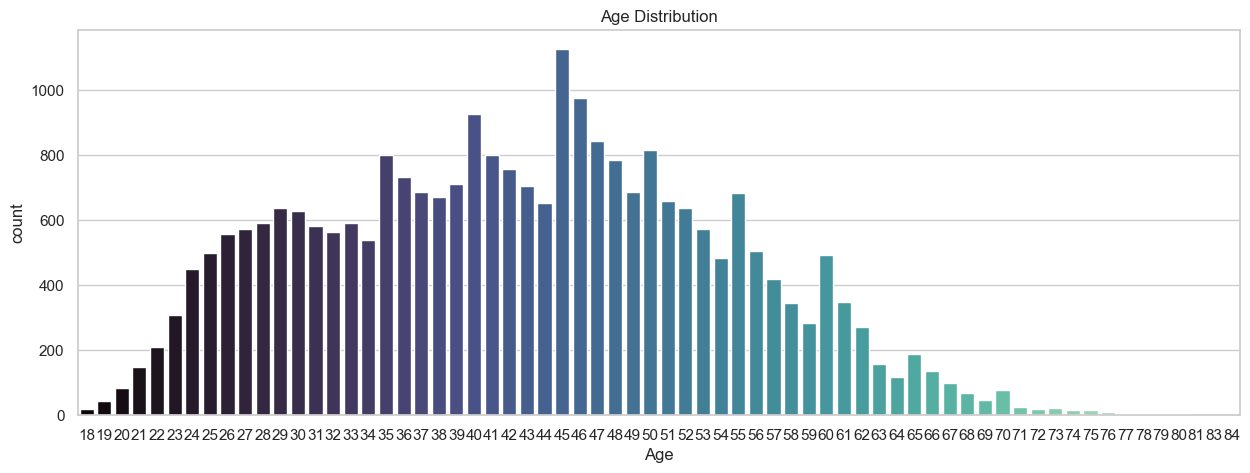

In [80]:
# Visual of Age Distribution
ax = plt.subplots(figsize = (15,5))
ax = sns.countplot(x=df['Age'], palette="mako", data=df)
ax.set_title('Age Distribution')

- We can see that age is well spread out, most of the finishers in the 24 - 60 year range.
- Finishers that are aged 45 have the highest count, expected the highest count of finishers at a lower age eg. 30

Text(0.5, 1.0, 'Age Distribution Based On Gender')

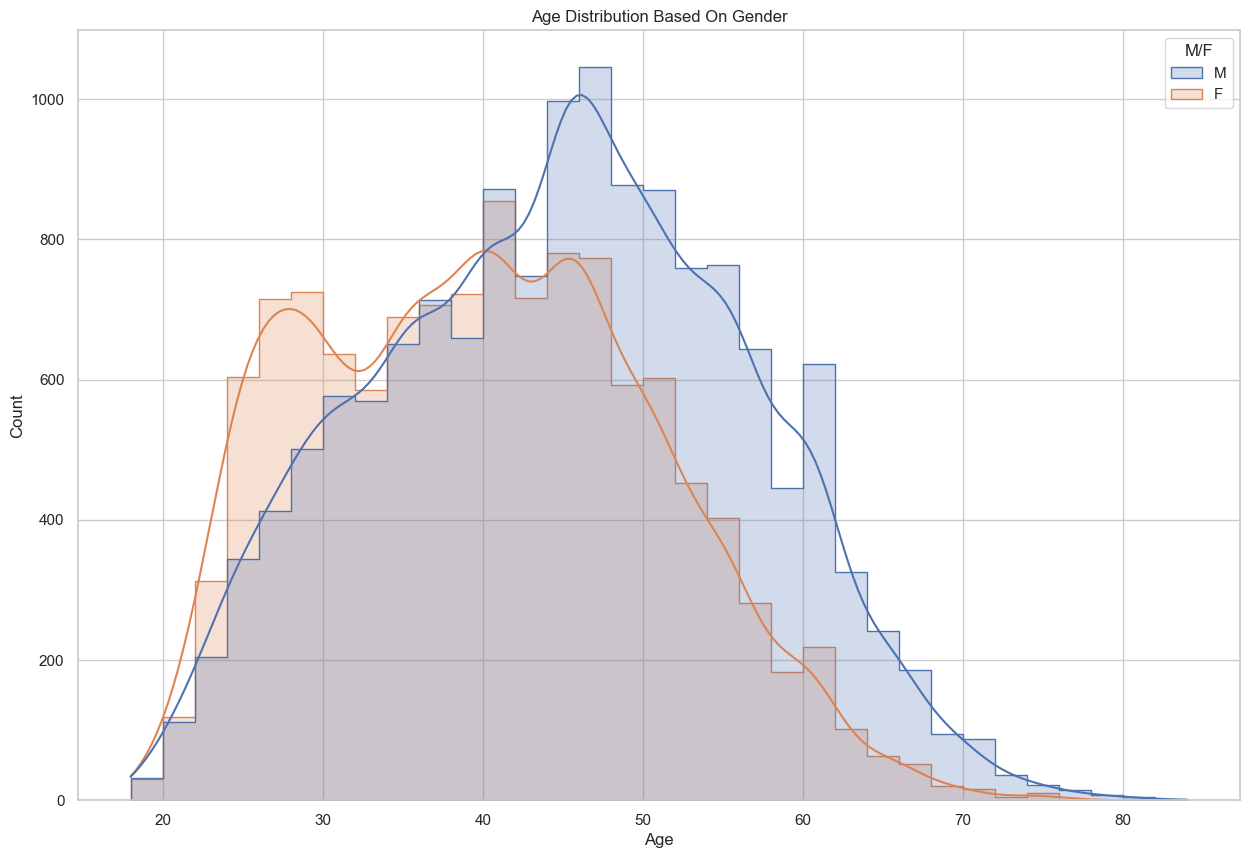

In [91]:
# Visual of Age distribution Based on Gender
ax = plt.subplots(figsize = (15,10))
ax = sns.histplot(x=df['Age'], hue = 'M/F', binwidth=2, kde=True, element='step', data = df)
ax.set_title('Age Distribution Based On Gender')

- Male: histogram has a normal distribution with a mean value at age 46.
- Female: The histogram is skewed to the right with a mean value similar to Males.
- We can also conclude that there were more female finishers of the younger half (20 - 45) and more male finishers of the older half (45 - 70).

Text(0.5, 1.0, 'Gender-specific Finishers')

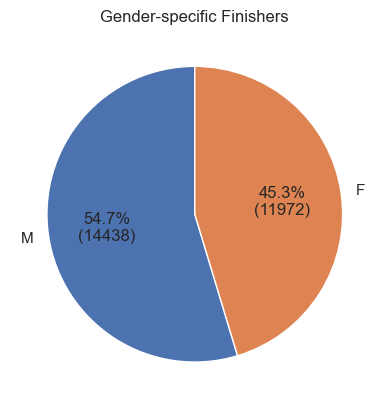

In [89]:
# Pie Chart of the Gender of Finishers
data = df['M/F'].value_counts()
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(data, autopct = lambda pct: func(pct, data), labels=['M','F'], startangle = 90)
ax.set_title('Gender-specific Finishers')                          

- Fairly even number of male and female finishers, expected for a larger difference.

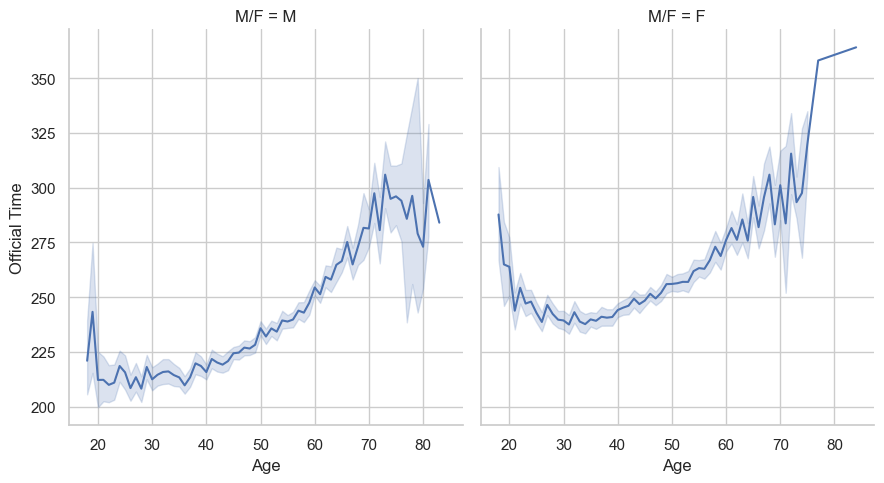

In [92]:
# Lineplot of Official Time to Age
ax = sns.relplot(x=df['Age'], y=df['Official Time'], kind='line', col=df['M/F'], height=5, aspect=.9)

- Male plot: We can see that from ages 20 to 40 is the range with the fastest times. And a steady positive slope from ages 40 to 70.
- Female plot: We can see that from ages 20 to 45 is the range with the fastest times, similar to men. However a more gradual increase in time from ages 50 to 70.

Text(0.5, 1.0, 'Correlation Matrix for Numeric Features')

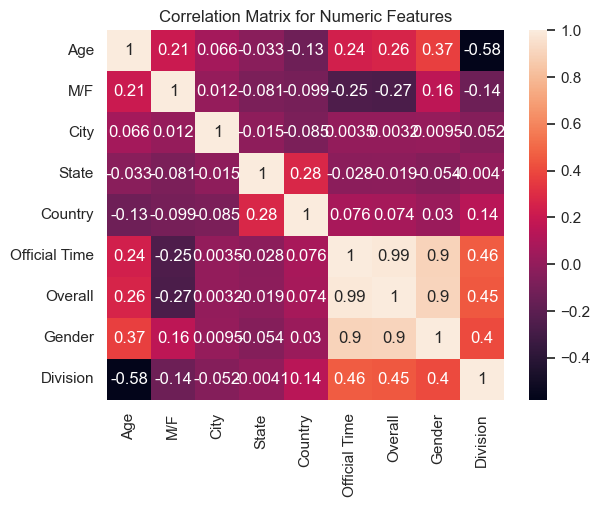

In [93]:
# Creating a Heatmap for Visual of Correlation of Columns
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')

In [96]:
# Checking Highest Correlated Values
corr = df_numerized.corr().unstack().sort_values()
high_corr = corr[(corr > 0.5) & (corr != 1)]
high_corr

Official Time  Gender           0.896282
Gender         Official Time    0.896282
Overall        Gender           0.902077
Gender         Overall          0.902077
Official Time  Overall          0.985788
Overall        Official Time    0.985788
dtype: float64

- We can conclude from the correlation matrix that Gender has the highest correlation to Official Time.
- However, age does not seem to have a high enough correlation to official time as I expected, my hypothesis was wrong.

In [99]:
my_age_group = df[df['Age'].isin([20,24])]
avg = mean(my_age_group["Official Time"]) / 60
round(avg,2)

3.95

In [100]:
my_age_group_by_gender = my_age_group[my_age_group['M/F'] == 'M']
avg = mean(my_age_group_by_gender["Official Time"]) / 60
round(avg,2)

3.62

- The average time for my age group (20 to 24) is 3.95 hours, also for my age group and gender ('M') the average time is 3.62 hours.

## Conclusion

- From this analysis I got a good sense of the distribution of finishing times from the Boston Marathon, and most importantly I found out the average time for my age group and gender, now I have a rough idea of what time to aim for and can hopefully beat the average to aim for the top ranks.

Thanks For Reading!